

##Importing Dataset


In [ ]:
import pandas as pd 
import numpy as np
from pathlib import Path
import cv2
import os
import random    
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mping
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Count number of items in a folder

dir_path = r'/content/drive/MyDrive/fish_data/rohu'
count = 0

for path in os.listdir(dir_path):
    
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('File count:', count)

File count: 29


##Data Preprocessing

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from skimage import io
datagen = ImageDataGenerator(  
        rescale=1/255, featurewise_center=True, featurewise_std_normalization=True,
        width_shift_range=0.2, height_shift_range=0.2,
        rotation_range = 40, fill_mode='nearest',
        zoom_range = 0.2,
        horizontal_flip = True, vertical_flip=True,
        brightness_range = (0.9, 1.8))
import numpy as np
import os
from PIL import Image
image_directory = r'/content/drive/MyDrive/Fish Species/vanjaram/'
SIZE = 224
dataset = []
my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images):    
    if (image_name.split('.')[1] == 'jpg'):        
        image = io.imread(image_directory + image_name)        
        image = Image.fromarray(image, 'RGB')        
        image = image.resize((SIZE,SIZE)) 
        dataset.append(np.array(image))
x = np.array(dataset)
i = 0
for batch in datagen.flow(x, batch_size=16,
                          save_to_dir= r'/content/drive/MyDrive/Fish Species/augmented/vanjaram/',
                          save_prefix='dr',
                          save_format='jpg'):    
    i += 1    
    if i > 50:        
        break

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from skimage import io
datagen = ImageDataGenerator(  
        rescale=1/255,
        zoom_range = 0.2,
        horizontal_flip = True, 
        vertical_flip=True)
import numpy as np
import os
from PIL import Image
image_directory = r'/content/drive/MyDrive/fish_data/surai/'
SIZE = 224
dataset = []
my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images):    
    if (image_name.split('.')[1] == 'jpg'):        
        image = io.imread(image_directory + image_name)        
        image = Image.fromarray(image, 'RGB')        
        image = image.resize((SIZE,SIZE)) 
        dataset.append(np.array(image))
x = np.array(dataset)
i = 0
for batch in datagen.flow(x, batch_size=16,
                          save_to_dir= r'/content/drive/MyDrive/aug_fish_data/surai',
                          save_prefix='dr',
                          save_format='jpg'):    
    i += 1    
    if i > 50:        
        break

##Splitting Data to train and validation sets

In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
splitfolders.ratio("/content/drive/MyDrive/fish_data", # The location of dataset
                   output="/content/drive/MyDrive/fish_temp_data", # The output location
                   seed=1100, # The number of seed
                   ratio=(.8, .2 ), # The ratio of splited dataset
                   group_prefix=None, # If your dataset contains more than one file like ".jpg", ".pdf", etc
                   move=False # If you choose to move, turn this into True
                   )

Copying files: 437 files [03:13,  2.26 files/s]


##Reading Data

(224, 224, 3)


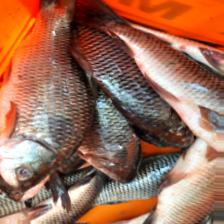

In [ ]:
image = cv2.imread("/content/drive/MyDrive/Fish Species/Dataset/val/rohu/dr_0_3318.jpg")
print(image.shape)
cv2_imshow(image)

In [ ]:
dir = "/content/drive/MyDrive/Fish Species/Dataset/train"
dir_lst = os.listdir(dir)
dir_lst

['black_vaval',
 '.ipynb_checkpoints',
 'illa',
 'kannadi_paarai',
 'kelangan',
 'koduva',
 'mathi',
 'nethili',
 'sheela',
 'paarai',
 'rohu',
 'scale_katla',
 'seabream',
 'shankara',
 'surai',
 'vanjaram']

In [ ]:
# def create_dataset(img_path): 
#   img_data = []
#   class_name = []
  
#   for directory in os.listdir(img_dir):
#     for files in os.listdir(os.path.join(img_dir, directory)):
#       img_path = os.path.join(img_dir, directory, files)
#       image = cv2.imread(img_path, cv2.COLOR_BGR2RGB)
#       image = cv2.resize(image, (img_height, img_width), interpolation = cv2. INTER_AREA)
#       image = np.array(image)
#       image = image.astype("float32")
#       image /= 255
#       print(img_path)
#       print(type(image))
#       img_data.append(image)
#       class_name.append(directory)
#   return img_data, class_name

In [ ]:
# plt.figure(figsize=(20,20)) 
# for i in range(5):
#   randomFile = random.choice (os.listdir (black_vovel))
#   image_path = os.path.join(black_vovel, randomfile)
#   img=mpimg.imread(image_path)
#   ax= plt.subplot(1, 5, i+1)
#   ax.title.set_text(randomfile)
#   plt.imshow(img)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
rescale = ImageDataGenerator(rescale=1/255)
train = rescale.flow_from_directory(
    '/content/drive/MyDrive/crt_data/train',
    classes = ['black_vaval','illa','kannadi_paarai','kelangan','koduva','mathi','nethili','sheela','paarai','rohu','scale_katla','seabream','shankara','surai','vanjaram'],
    target_size =(256,256),
    batch_size = 20,
    class_mode = 'binary',
    shuffle = 'True'
)

validate = rescale.flow_from_directory(
    '/content/drive/MyDrive/crt_data/val/',
    classes = ['black_vaval','illa','kannadi_paarai','kelangan','koduva','mathi','nethili','sheela','paarai','rohu','scale_katla','seabream','shankara','surai','vanjaram'],
    target_size =(256,256),
    batch_size = 20,
    class_mode = 'binary',
    shuffle = 'True'
)

Found 4792 images belonging to 15 classes.
Found 1201 images belonging to 15 classes.


##Model Training


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import os
#from google.colab.patches import cv2_imshow

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten


In [ ]:
!unzip -q "/content/drive/MyDrive/DL/final_dataset.zip" -d "/content/drive/MyDrive/DL/final_dataset"

unzip:  cannot find or open /content/drive/MyDrive/DL/final_dataset.zip, /content/drive/MyDrive/DL/final_dataset.zip.zip or /content/drive/MyDrive/DL/final_dataset.zip.ZIP.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = ImageDataGenerator(rescale = 1.0/255)
validation = ImageDataGenerator(rescale = 1.0/255)

In [ ]:
train_dataset = train.flow_from_directory("/content/drive/MyDrive/crt_data/train", target_size = (256,256),batch_size = 128, classes = ['black_vaval','illa','kannadi_paarai','kelangan','koduva','mathi','nethili','sheela','paarai','rohu','scale_katla','seabream','shankara','surai','vanjaram'],
    )

Found 4792 images belonging to 15 classes.


In [ ]:
val_dataset = train.flow_from_directory("/content/drive/MyDrive/crt_data/val", target_size = (256,256),batch_size = 128, classes = ['black_vaval','illa','kannadi_paarai','kelangan','koduva','mathi','nethili','sheela','paarai','rohu','scale_katla','seabream','shankara','surai','vanjaram'],
    )

Found 1201 images belonging to 15 classes.


In [ ]:
train_dataset.class_indices

{'black_vaval': 0,
 'illa': 1,
 'kannadi_paarai': 2,
 'kelangan': 3,
 'koduva': 4,
 'mathi': 5,
 'nethili': 6,
 'sheela': 7,
 'paarai': 8,
 'rohu': 9,
 'scale_katla': 10,
 'seabream': 11,
 'shankara': 12,
 'surai': 13,
 'vanjaram': 14}

In [ ]:

model = Sequential()
model.add(Conv2D(input_shape=(256,256,3),filters=32,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [ ]:
model = Sequential()

model.add(Flatten(input_shape=(256,256,3)))
model.add(Dense(units=1024,activation="relu"))
model.add(Dense(units=512,activation="relu"))
model.add(Dense(units=256,activation="relu"))

model.add(Dense(units=15, activation="softmax"))

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'Adam',
             metrics = ['accuracy'])

In [ ]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                patience=5)

In [ ]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 15,
                     epochs = 5,
                    verbose = 1,
                     validation_data = val_dataset,
                      callbacks = early_stopping)


Epoch 1/5
15/15 [==============================] - 45s 3s/step - loss: 1.9597 - accuracy: 0.3420 - val_loss: 2.1744 - val_accuracy: 0.3014
Epoch 2/5
15/15 [==============================] - 21s 1s/step - loss: 1.6677 - accuracy: 0.4151 - val_loss: 1.6087 - val_accuracy: 0.4571
Epoch 3/5
15/15 [==============================] - 16s 983ms/step - loss: 1.5277 - accuracy: 0.4667 - val_loss: 1.6979 - val_accuracy: 0.4147
Epoch 4/5
15/15 [==============================] - 15s 1s/step - loss: 1.5057 - accuracy: 0.4667 - val_loss: 1.7716 - val_accuracy: 0.4055
Epoch 5/5
15/15 [==============================] - 13s 893ms/step - loss: 1.3845 - accuracy: 0.5375 - val_loss: 1.4982 - val_accuracy: 0.5121


In [ ]:
model.save('/content/drive/MyDrive/fish_Model.h5')